In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

### geneerate a multinomial random variable

In [3]:
a = np.random.uniform(0,10)
a

3.628772511669589

#### modellling where in a host gene trnas are located 
a gene X has 3 introns with the following lengths
- intron1 = 8 #0-7 == 8/16
- intron2= 12 # 9-12 ==4/16
- intron3: 16 #12-15 = 4/16
sample from a uniform distribution based on the proportion of each intron

In [6]:
def intron_loc(in1,in2,):
    """inputs: upper bound of each intron"""
    trna = np.random.uniform(0,1)
    if trna <in1: 
        return('1st_intron')
    if trna <in1+in2: 
        return('2nd_intron')
    else: return('3rd_intron')

In [9]:
locs = []
for i in range(10000):
    locs.append(intron_loc(0.5,0.25))

In [11]:
locs.count('1st_intron')

4974

In [12]:
locs.count('2nd_intron')

2462

In [13]:
locs.count('3rd_intron')

2564

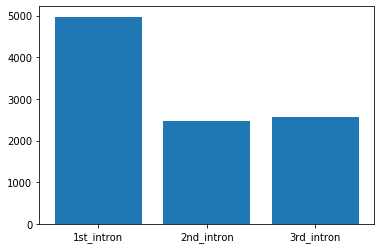

In [16]:
plt.bar(['1st_intron','2nd_intron','3rd_intron'],[locs.count('1st_intron'),locs.count('2nd_intron'), locs.count('3rd_intron')])
plt.show()

## poisson now for modelling dist within introns
if a gene has 16 introns, 13 trnas what is the probability of single intron hosting 5 trnas

In [17]:
from scipy.stats import poisson 

In [18]:
poisson.pmf(5,(13/16))

0.0013093969822083672

In [19]:
##plot the probs of trna occruence
probs = []
for i in range(13):
    probs.append(poisson.pmf(i,(13/16)))
len(probs)

13

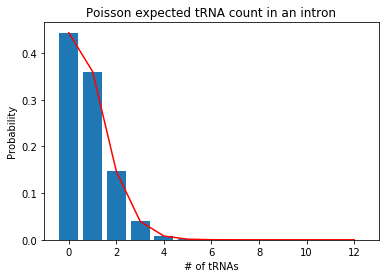

In [26]:
plt.bar(np.arange(13),probs)
plt.plot(np.arange(13),probs,color='red')
plt.title('Poisson expected tRNA count in an intron')
plt.xlabel('# of tRNAs'); plt.ylabel('Probability')
plt.show()

deviation of trnas from expected count values under uniform or even proportional dist is evidence that trnas arise by tandem duplication not de novo
- extract all introns for the longest isoform for ECR:
- add the legnths
- then find their portion


In [29]:
## recycle old code to extracting introns
##previously I calculated the total intron size for each transcript
import pandas as pd
total_introns = pd.read_table('total_introns_transc_genes.csv', sep=',')##total introns for all transcripts 
nested_trnas = pd.read_table('trna_host_genes_merged.csv',sep=',')

In [30]:
nested_trnas.head()

,Chrom,Start,End,Strand,tRNA_ID,tRNA_name,Host_Exon_ID,intron_length,mRNA_length,Host_gene_name,...,Intron_Sequence,A-content,G-content,T-content,C-content,tRNA_Sequence,A-content_trna,G-content_trna,T-content_trna,C-content_trna
0,3L,13249547,13249618,+,FBgn0011844,sp-GTC-1-10-,FBtr0305480,12439,4841,caps,...,GTAAGTTCAGACCCGATACTCAATTCCACTCCAATTCCCAGCCATC...,0.282901,0.208779,0.291181,0.217140,UCCUCGAUAGUAUAGUGGUUAGUAUCCCCGCCUGUCACGCGGGAGA...,0.166667,0.319444,0.236111,0.277778
1,3R,24555302,24555373,+,FBgn0011845,sp-GTC-1-11-,FBtr0084647,325,3120,Esyt2,...,GTGAGTTCAGTTTTCCACAACTCAACGATAAACTTGCAGAATTACG...,0.286154,0.172308,0.350769,0.190769,UCCUCGAUAGUAUAGUGGUUAGUAUCCCCGCCUGUCACGCGGGAGA...,0.166667,0.319444,0.236111,0.277778
2,3L,1397695,1397766,+,FBgn0011851,Glu-CTC-3-4-,FBtr0310161,126467,5167,Ptp61F,...,GTAAGTGAGCAAGCAATGTTATAGTTATAGCCGGGCTAATCTGATT...,0.268979,0.226012,0.280136,0.224873,UCCCAUAUUGUCUAGUGGUUAGGAUAUCCGGCUCUCACCCGGAAGG...,0.194444,0.277778,0.263889,0.263889
3,3L,1397932,1398003,+,FBgn0011852,Glu-CTC-3-5-,FBtr0310161,126467,5167,Ptp61F,...,GTAAGTGAGCAAGCAATGTTATAGTTATAGCCGGGCTAATCTGATT...,0.268979,0.226012,0.280136,0.224873,UCCCAUAUUGUCUAGUGGUUAGGAUAUCCGGCUCUCACCCGGAAGG...,0.194444,0.277778,0.263889,0.263889
4,3L,1398169,1398240,+,FBgn0011853,Glu-CTC-3-6-,FBtr0310161,126467,5167,Ptp61F,...,GTAAGTGAGCAAGCAATGTTATAGTTATAGCCGGGCTAATCTGATT...,0.268979,0.226012,0.280136,0.224873,UCCCAUAUUGUCUAGUGGUUAGGAUAUCCGGCUCUCACCCGGAAGG...,0.194444,0.277778,0.263889,0.263889


In [32]:
total_introns.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28953 entries, 0 to 28952
Data columns (total 4 columns):
Transcript ID        28953 non-null object
Total Intron Size    28953 non-null float64
Present              28953 non-null object
Gene ID              28953 non-null object
dtypes: float64(1), object(3)
memory usage: 904.9+ KB


In [313]:
##load table with id of host genes
host_info = pd.read_table('paren_gene)ds.txt',sep='\t')
host_info.head()

,# submitted_id,current_id,converted_id,current_symbol
0,FBgn0011225,FBgn0011225,FBgn0011225,jar
1,FBgn0014135,FBgn0014135,FBgn0014135,bnl
2,FBgn0044020,FBgn0044020,FBgn0044020,Roc2
3,FBgn0000542,FBgn0000542,FBgn0000542,ec
4,FBgn0051248,FBgn0051248,FBgn0051248,CG31248


In [36]:
##load the ecdysone receptor gene id
ecr = host_info[host_info['# submitted_id']=='EcR']['current_id'].values[0]
ecr

'FBgn0000546'

In [33]:
total_introns.head()

,Transcript ID,Total Intron Size,Present,Gene ID
0,FBtr0333673,14681.0,Yes,FBgn0264607
1,FBtr0300378,12316.0,Yes,FBgn0264607
2,FBtr0089217,14657.0,Yes,FBgn0264607
3,FBtr0100146,14537.0,Yes,FBgn0264607
4,FBtr0100148,14579.0,Yes,FBgn0264607


In [38]:
##get ecr transcript with highest intron composion 
total_introns[total_introns['Gene ID']==ecr].sort_values(by='Total Intron Size', ascending=False)

,Transcript ID,Total Intron Size,Present,Gene ID
10991,FBtr0086008,73561.0,Yes,FBgn0000546
11540,FBtr0086009,61524.0,Yes,FBgn0000546
11538,FBtr0086010,61478.0,Yes,FBgn0000546
11539,FBtr0086012,36520.0,Yes,FBgn0000546
11537,FBtr0302439,35554.0,Yes,FBgn0000546
11541,FBtr0086011,35554.0,Yes,FBgn0000546


In [40]:
trans_id = total_introns[total_introns['Gene ID']==ecr].sort_values(by='Total Intron Size', ascending=False)['Transcript ID'].values[0]
trans_id

'FBtr0086008'

In [42]:
all_introns = pd.read_table('dmel_introns_ensembl.bed', sep='\t', header=None, names=['Chrom','Start','End','ID','Phase','Strand'])
all_introns.head()

,Chrom,Start,End,ID,Phase,Strand
0,chr4,1037422,1037475,FBtr0333673_intron_0_0_chr4_1037423_r,0,-
1,chr4,1037569,1037645,FBtr0333673_intron_1_0_chr4_1037570_r,0,-
2,chr4,1037740,1038358,FBtr0333673_intron_2_0_chr4_1037741_r,0,-
3,chr4,1038434,1045155,FBtr0333673_intron_3_0_chr4_1038435_r,0,-
4,chr4,1045248,1047263,FBtr0333673_intron_4_0_chr4_1045249_r,0,-


In [48]:
##parse to get transcript id
ids = []
for ID in all_introns['ID'].values:
    ids.append(ID.split('_')[0])
all_introns['Transcript ID']=ids
all_introns.head()

,Chrom,Start,End,ID,Phase,Strand,Transcript ID
0,chr4,1037422,1037475,FBtr0333673_intron_0_0_chr4_1037423_r,0,-,FBtr0333673
1,chr4,1037569,1037645,FBtr0333673_intron_1_0_chr4_1037570_r,0,-,FBtr0333673
2,chr4,1037740,1038358,FBtr0333673_intron_2_0_chr4_1037741_r,0,-,FBtr0333673
3,chr4,1038434,1045155,FBtr0333673_intron_3_0_chr4_1038435_r,0,-,FBtr0333673
4,chr4,1045248,1047263,FBtr0333673_intron_4_0_chr4_1045249_r,0,-,FBtr0333673


In [51]:
ID.split('_')[2]

'0'

In [52]:
## also intron rank to bed file and length
rank = []
for ID in all_introns['ID'].values:
    rank.append(ID.split('_')[2])
all_introns['Intron_Rank']=rank
all_introns['Length']= np.abs(all_introns['End']- all_introns['Start'])
all_introns.head()

,Chrom,Start,End,ID,Phase,Strand,Transcript ID,Intron_Rank,Length
0,chr4,1037422,1037475,FBtr0333673_intron_0_0_chr4_1037423_r,0,-,FBtr0333673,0,53
1,chr4,1037569,1037645,FBtr0333673_intron_1_0_chr4_1037570_r,0,-,FBtr0333673,1,76
2,chr4,1037740,1038358,FBtr0333673_intron_2_0_chr4_1037741_r,0,-,FBtr0333673,2,618
3,chr4,1038434,1045155,FBtr0333673_intron_3_0_chr4_1038435_r,0,-,FBtr0333673,3,6721
4,chr4,1045248,1047263,FBtr0333673_intron_4_0_chr4_1045249_r,0,-,FBtr0333673,4,2015


In [53]:
## then get all introns for that trancript
ecr_introns = all_introns[all_introns['Transcript ID']==trans_id]
ecr_introns

,Chrom,Start,End,ID,Phase,Strand,Transcript ID,Intron_Rank,Length
60061,chr2R,6093733,6093796,FBtr0086008_intron_0_0_chr2R_6093734_r,0,-,FBtr0086008,0,63
60062,chr2R,6093949,6094009,FBtr0086008_intron_1_0_chr2R_6093950_r,0,-,FBtr0086008,1,60
60063,chr2R,6094153,6094556,FBtr0086008_intron_2_0_chr2R_6094154_r,0,-,FBtr0086008,2,403
60064,chr2R,6095071,6151829,FBtr0086008_intron_3_0_chr2R_6095072_r,0,-,FBtr0086008,3,56758
60065,chr2R,6151996,6152068,FBtr0086008_intron_4_0_chr2R_6151997_r,0,-,FBtr0086008,4,72
60066,chr2R,6152550,6168755,FBtr0086008_intron_5_0_chr2R_6152551_r,0,-,FBtr0086008,5,16205


In [56]:
##add their relative intron proportion which will be their prob under uniform assumption
ecr_introns['Relative_length'] = ecr_introns['Length']/ecr_introns['Length'].sum()
ecr_introns

c:\users\rwint\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Chrom,Start,End,ID,Phase,Strand,Transcript ID,Intron_Rank,Length,Relative_length
60061,chr2R,6093733,6093796,FBtr0086008_intron_0_0_chr2R_6093734_r,0,-,FBtr0086008,0,63,0.000856
60062,chr2R,6093949,6094009,FBtr0086008_intron_1_0_chr2R_6093950_r,0,-,FBtr0086008,1,60,0.000816
60063,chr2R,6094153,6094556,FBtr0086008_intron_2_0_chr2R_6094154_r,0,-,FBtr0086008,2,403,0.005478
60064,chr2R,6095071,6151829,FBtr0086008_intron_3_0_chr2R_6095072_r,0,-,FBtr0086008,3,56758,0.771577
60065,chr2R,6151996,6152068,FBtr0086008_intron_4_0_chr2R_6151997_r,0,-,FBtr0086008,4,72,0.000979
60066,chr2R,6152550,6168755,FBtr0086008_intron_5_0_chr2R_6152551_r,0,-,FBtr0086008,5,16205,0.220293


In [167]:
all_introns.to_csv('dmel_all_introns_ensembl_updated.bed',sep='\t',index=False)

### now I need to get the empirical dist of the trnas inside these introns 

In [57]:
nested_trnas = pd.read_table('trna_host_genes_merged.csv',sep=',')
nested_trnas.head()

,Chrom,Start,End,Strand,tRNA_ID,tRNA_name,Host_Exon_ID,intron_length,mRNA_length,Host_gene_name,...,Intron_Sequence,A-content,G-content,T-content,C-content,tRNA_Sequence,A-content_trna,G-content_trna,T-content_trna,C-content_trna
0,3L,13249547,13249618,+,FBgn0011844,sp-GTC-1-10-,FBtr0305480,12439,4841,caps,...,GTAAGTTCAGACCCGATACTCAATTCCACTCCAATTCCCAGCCATC...,0.282901,0.208779,0.291181,0.217140,UCCUCGAUAGUAUAGUGGUUAGUAUCCCCGCCUGUCACGCGGGAGA...,0.166667,0.319444,0.236111,0.277778
1,3R,24555302,24555373,+,FBgn0011845,sp-GTC-1-11-,FBtr0084647,325,3120,Esyt2,...,GTGAGTTCAGTTTTCCACAACTCAACGATAAACTTGCAGAATTACG...,0.286154,0.172308,0.350769,0.190769,UCCUCGAUAGUAUAGUGGUUAGUAUCCCCGCCUGUCACGCGGGAGA...,0.166667,0.319444,0.236111,0.277778
2,3L,1397695,1397766,+,FBgn0011851,Glu-CTC-3-4-,FBtr0310161,126467,5167,Ptp61F,...,GTAAGTGAGCAAGCAATGTTATAGTTATAGCCGGGCTAATCTGATT...,0.268979,0.226012,0.280136,0.224873,UCCCAUAUUGUCUAGUGGUUAGGAUAUCCGGCUCUCACCCGGAAGG...,0.194444,0.277778,0.263889,0.263889
3,3L,1397932,1398003,+,FBgn0011852,Glu-CTC-3-5-,FBtr0310161,126467,5167,Ptp61F,...,GTAAGTGAGCAAGCAATGTTATAGTTATAGCCGGGCTAATCTGATT...,0.268979,0.226012,0.280136,0.224873,UCCCAUAUUGUCUAGUGGUUAGGAUAUCCGGCUCUCACCCGGAAGG...,0.194444,0.277778,0.263889,0.263889
4,3L,1398169,1398240,+,FBgn0011853,Glu-CTC-3-6-,FBtr0310161,126467,5167,Ptp61F,...,GTAAGTGAGCAAGCAATGTTATAGTTATAGCCGGGCTAATCTGATT...,0.268979,0.226012,0.280136,0.224873,UCCCAUAUUGUCUAGUGGUUAGGAUAUCCGGCUCUCACCCGGAAGG...,0.194444,0.277778,0.263889,0.263889


In [62]:
##smallest possible host intron isze
nested_trnas['intron_length'].min()

214

In [58]:
ecr_trnas=nested_trnas[nested_trnas['Host_gene_name']=='EcR']
ecr_trnas

,Chrom,Start,End,Strand,tRNA_ID,tRNA_name,Host_Exon_ID,intron_length,mRNA_length,Host_gene_name,...,Intron_Sequence,A-content,G-content,T-content,C-content,tRNA_Sequence,A-content_trna,G-content_trna,T-content_trna,C-content_trna
10,2R,6166151,6166224,+,FBgn0011880,Ile-AAT-1-1-,FBtr0086008,16205,5108,EcR,...,GTATCCGACTTATTTGAATCCTAGCCGTTTTACCTCTTTTTCCCTC...,0.321444,0.186177,0.311571,0.180808,GGCCCAUUAGCUCAGUUGGUUAGAGCGUCGUGCUAAUAACGCGAAG...,0.189189,0.310811,0.229730,0.270270
16,2R,6165984,6166056,+,FBgn0011887,Lys-CTT-1-4-,FBtr0086008,16205,5108,EcR,...,GTATCCGACTTATTTGAATCCTAGCCGTTTTACCTCTTTTTCCCTC...,0.321444,0.186177,0.311571,0.180808,GCCCGGCUAGCUCAGUCGGUAGAGCAUGAGACUCUUAAUCUCAGGG...,0.164384,0.342466,0.219178,0.273973
17,2R,6164876,6164948,-,FBgn0011888,Lys-CTT-1-3-,FBtr0086008,16205,5108,EcR,...,GTATCCGACTTATTTGAATCCTAGCCGTTTTACCTCTTTTTCCCTC...,0.321444,0.186177,0.311571,0.180808,GCCCGGCUAGCUCAGUCGGUAGAGCAUGAGACUCUUAAUCUCAGGG...,0.164384,0.342466,0.219178,0.273973
18,2R,6162681,6162753,-,FBgn0011889,Lys-CTT-1-2-,FBtr0086008,16205,5108,EcR,...,GTATCCGACTTATTTGAATCCTAGCCGTTTTACCTCTTTTTCCCTC...,0.321444,0.186177,0.311571,0.180808,GCCCGGCUAGCUCAGUCGGUAGAGCAUGAGACUCUUAAUCUCAGGG...,0.164384,0.342466,0.219178,0.273973
19,2R,6142372,6142444,-,FBgn0011891,Lys-CTT-1-1-,FBtr0086008,16205,5108,EcR,...,GTATCCGACTTATTTGAATCCTAGCCGTTTTACCTCTTTTTCCCTC...,0.321444,0.186177,0.311571,0.180808,GCCCGGCUAGCUCAGUCGGUAGAGCAUGAGACUCUUAAUCUCAGGG...,0.164384,0.342466,0.219178,0.273973
31,2R,6162519,6162592,+,FBgn0011931,sn-GTT-1-6-,FBtr0086008,16205,5108,EcR,...,GTATCCGACTTATTTGAATCCTAGCCGTTTTACCTCTTTTTCCCTC...,0.321444,0.186177,0.311571,0.180808,GCCUCCGUGGCGCAAUUGGUUAGCGCGUUCGGCUGUUAACCGAAAG...,0.135135,0.378378,0.229730,0.256757
32,2R,6162197,6162270,+,FBgn0011932,sn-GTT-1-5-,FBtr0086008,56758,5108,EcR,...,GTGAGTTGAAGAATACATTTTTAAGTACAATCGGTTTAAATTTTAC...,0.285792,0.210561,0.297086,0.206561,GCCUCCGUGGCGCAAUUGGUUAGCGCGUUCGGCUGUUAACCGAAAG...,0.135135,0.378378,0.229730,0.256757
33,2R,6162023,6162096,-,FBgn0011933,sn-GTT-1-4-,FBtr0086008,16205,5108,EcR,...,GTATCCGACTTATTTGAATCCTAGCCGTTTTACCTCTTTTTCCCTC...,0.321444,0.186177,0.311571,0.180808,GCCUCCGUGGCGCAAUUGGUUAGCGCGUUCGGCUGUUAACCGAAAG...,0.135135,0.378378,0.229730,0.256757
36,2R,6153506,6153579,-,FBgn0011936,sn-GTT-1-3-,FBtr0086008,16205,5108,EcR,...,GTATCCGACTTATTTGAATCCTAGCCGTTTTACCTCTTTTTCCCTC...,0.321444,0.186177,0.311571,0.180808,GCCUCCGUGGCGCAAUUGGUUAGCGCGUUCGGCUGUUAACCGAAAG...,0.135135,0.378378,0.229730,0.256757
37,2R,6153186,6153259,+,FBgn0011937,sn-GTT-1-2-,FBtr0086008,16205,5108,EcR,...,GTATCCGACTTATTTGAATCCTAGCCGTTTTACCTCTTTTTCCCTC...,0.321444,0.186177,0.311571,0.180808,GCCUCCGUGGCGCAAUUGGUUAGCGCGUUCGGCUGUUAACCGAAAG...,0.135135,0.378378,0.229730,0.256757


#### looking at both tables, we see that the trnas are nested in only 2 of the 6 introns
### Model the distribution of trnas under prob of uniform distribution 

In [70]:
ecr_trnas['intron_length'].value_counts()

16205    11
56758     2
Name: intron_length, dtype: int64

In [67]:
##since 3 out of 6 introns is less than a trna size I will omit those and modify the exiting probs
probs_introns = ecr_introns[ecr_introns['Length']>200]['Relative_length'].values ###214 was the smallest intron sie to host trna
intron_rank = ecr_introns[ecr_introns['Length']>200]['Intron_Rank'].values
probs_introns

array([0.00547845, 0.77157733, 0.22029336])

In [98]:
##round to 2dp
sum(probs_introns.round(2))

1.0

In [99]:
probs_introns = probs_introns.round(2)

In [143]:
##start with modelling tRNA origin in introns as a uniform multinomial variable
## actually this is a (very similar to a poisson)

def random_trna_loc(intron_probs):
    """Input:
    intron_probs: list of fraction of each intron
    Output:
    location or intron rank of each trna"""
    pmass = intron_probs
    loc=0  ##0 is the first intron
    intron= pmass[0]
    trna = np.random.uniform(0,1)
    ##enter while if the trna location is greater than the intron size
    while(trna>intron):
        loc = loc+1
        intron = intron+pmass[loc]
    return loc #the location of the intron, 1st intron, 2nd intron, 3rd intron...

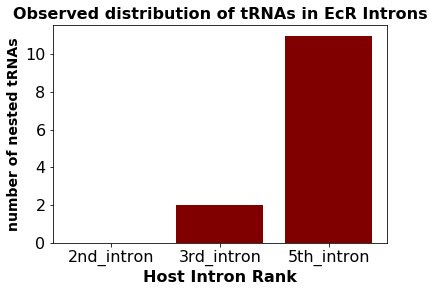

In [158]:
##empirical distribution of trnas
ecr_trnas['intron_length'].value_counts();
plt.bar(['2nd_intron','3rd_intron','5th_intron'],[0,2,11],color='maroon')
plt.ylabel('number of nested tRNAs',fontweight='bold',fontsize=14)
plt.xlabel('Host Intron Rank',fontweight='bold',fontsize=16)
plt.title('Observed distribution of tRNAs in EcR Introns',fontweight='bold',fontsize=16)
plt.xticks(fontsize=16);plt.yticks(fontsize=16)
plt.show()

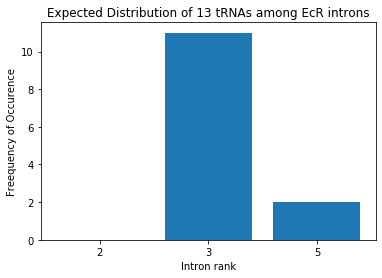

In [168]:
locs = []
for i in range(13): 
    locs.append(random_trna_loc(probs_introns))

plt.bar(intron_rank,
        np.asarray([locs.count(0),locs.count(1), locs.count(2)]))
plt.title('Expected Distribution of 13 tRNAs among EcR introns')
plt.xlabel('Intron rank'); plt.ylabel('Freequency of Occurence')
plt.show()

In [94]:
locs

[1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1]

In [111]:
## do a 1000 simulations of assigning 13 trnas then take the mean
sim = []
for j in range(1000):
    locs = []
    for i in range(13): 
        locs.append(random_trna_loc(probs_introns))
    ##c
    sim.append(np.asarray([locs.count(0),locs.count(1), locs.count(2)]))

In [112]:
##take the mean trna counts for each of the 3 introns
np.mean(sim,axis=0)

array([ 0.132, 10.057,  2.811])

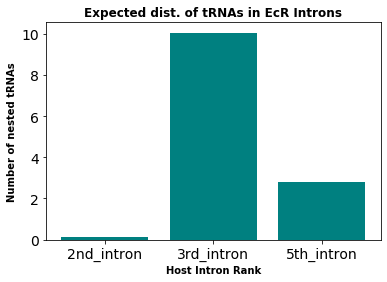

In [120]:
plt.bar(['2nd_intron','3rd_intron','5th_intron'],
        np.mean(sim,axis=0),color='teal')
plt.ylabel('Number of nested tRNAs',fontweight='bold');plt.xlabel('Host Intron Rank',fontweight='bold')
plt.title('Expected dist. of tRNAs in EcR Introns',fontweight='bold')
plt.xticks(fontsize=14);plt.yticks(fontsize=14)
plt.show()

In [122]:
##pearson's chi square test of significance
from scipy.stats import chisquare

In [124]:
expected = np.mean(sim,axis=0)
chisquare(f_obs=[0,2,11],f_exp=expected) 

Power_divergenceResult(statistic=30.442912573712263, pvalue=2.451351154324782e-07)

### try poisson spatial point analysis approach

In [125]:
from scipy.stats import poisson

In [127]:
##total intron size of ecr
tot = ecr_introns['Length'].sum()  #73kb, lets per 200b
tot

73561

In [147]:
#lets window this total intron area into per 200b
tot/200


367.805

In [148]:
##average rate or intensity of intron counts per 200b
lam = 13/(tot/200)
lam

0.035344815867103495

#### expected numbr of trnas in a region = Pois(lam*scaled_intron_size)
- expected for 11 trnas in intron size of 16kb
- expected for 2 trnas in 53Kb

In [130]:
ecr_trnas['intron_length'].value_counts()

16205    11
56758     2
Name: intron_length, dtype: int64

In [140]:
16205/200

81.025

In [141]:
56758/200

283.79

In [144]:
##the expected number of trnas in 81 windows, i.e. a 16Kb intron assumping complete spatail randomness
np.random.poisson(lam*81) ##

2

In [145]:
np.random.poisson(lam*283) ##

8

In [ ]:
np.random.poisson(lam*(400/200) ##

In [149]:
##1000 simulations
sim = []
for j in range(1000):
    in_5 = np.random.poisson(lam*(16205/200))
    in_3= np.random.poisson(lam*(56758/200))
    in_2 = np.random.poisson(lam*(400/200))
    sim.append([in_2,in_3,in_5])               

In [151]:
np.mean(sim,axis=0)

array([ 0.063, 10.036,  2.854])

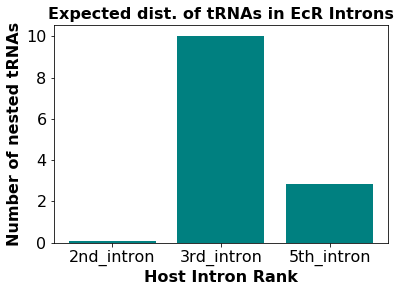

In [156]:
plt.bar(['2nd_intron','3rd_intron','5th_intron'],
        np.mean(sim,axis=0),color='teal')
plt.ylabel('Number of nested tRNAs',fontweight='bold',fontsize=16);plt.xlabel('Host Intron Rank',fontweight='bold',fontsize=16)
plt.title('Expected dist. of tRNAs in EcR Introns',fontweight='bold',fontsize=16)
plt.xticks(fontsize=16);plt.yticks(fontsize=16)
plt.show()

distribution of trnas among EcR introns is not random. I.e. does not follow an independent or complete spatial random process. This is expected because tRNAs cluster.
- use a inhomogenous poisson to model or thomas point process to model trnas?

### lets do for all host genes
``` for each host gene:
          get transcript with highest intron
          extract all introns for transcript above 200nt
          plot observed trna distribution
          generate expected trna distribution under a complete spatial randomness
          compute pearson's chisquare test statistic and same
          
    

In [166]:
host_names = host_info.drop_duplicates('# submitted_id')['current_symbol'].values

In [352]:
host_info.shape

(66, 4)

In [380]:
host_info['current_symbol'].unique()

array(['jar', 'bnl', 'Roc2', 'ec', 'CG31248', 'lncRNA:CR44999', 'sprt',
       'ABCA', 'mrj', 'hts', 'mub', 'kkv', 'Lrt', 'CG11044', 'Dbx',
       'CG10713', 'CG31279', 'CG43175', 'Dop2R', 'CG32521', 'tai', 'erm',
       'Pu', 'hng3', 'Mmp2', 'CG42340', 'Golgin104', 'caps', 'Sema1a',
       'prominin-like', 'tkv', 'd', 'CG4238', 'Ptp61F', 'pcs', 'Wdr62',
       'bon', 'Mctp', 'EcR', 'sm', 'Nuak1', 'nmo', 'Bx', 'CG14322', 'ome',
       'gol', 'qin', 'CG9287', 'bs', 'Naam', 'TrpA1', 'Ntl', 'CG15431',
       'Sulf1', 'Cht7', 'Esyt2', 'Btk29A', 'Ptr', 'mim', 'ATP8A', 'PIG-S',
       'Ect4', 'CG9289', 'p', 'pyd', 'sr'], dtype=object)

In [ ]:
summary_dict = dict()
for host in host_names:
    host_id = host_info[host_info['current_symbol']==host]['current_id'].values[0]
    ##get the transcript with longest intron
    trans_id = total_introns[total_introns['Gene ID']==host_id].sort_values(by='Total Intron Size', ascending=False)['Transcript ID'].values[0]
    ## then get all introns for that trancript
    trans_introns = all_introns[all_introns['Transcript ID']==trans_id]
    ##add their relative intron proportion which will be their prob under uniform assumption
    trans_introns['Relative_length'] = trans_introns['Length']/trans_introns['Length'].sum()
    
    trans_trnas=nested_trnas[nested_trnas['Host_gene_name']==host]
    
    probs_introns = trans_introns[trans_introns['Length']>200]['Relative_length'].values.round(2) ###214 was the smallest intron sie to host trna
    intron_rank = trans_introns[trans_introns['Length']>200]['Intron_Rank'].values
    
    ##get the observed trna counts
    trna_counts = trans_trnas['intron_length'].value_counts().to_frame().reset_index()
    trna_counts.columns=['intron_length','number of trnas']
    
    lengths = trans_introns[trans_introns['Length']>200]['Length'].values
    counts = []
    rank = []
    for l in lengths:
        ##append rank_intron_length
        rank.append('['+trans_introns[trans_introns['Length']==l]['Intron_Rank'].values[0]+']'+'\n'+str(l)+'nt')
        
        trnas = trna_counts[trna_counts['intron_length']==l]['number of trnas'].values
        if trnas:
            counts.append(trnas[0])
        else:
            counts.append(0)  ##doesnt have a trna
    
    ###plot the empirical distribution 
    plt.bar(rank,counts,color='maroon')
    plt.ylabel('number of nested tRNAs',fontweight='bold',fontsize=14)
    plt.xlabel('Position of Intron',fontweight='bold',fontsize=16)
    plt.title('Observed dist. of tRNAs in {} introns'.format(host),fontweight='bold',fontsize=16)
    plt.xticks(fontsize=16);plt.yticks(fontsize=16)
    plt.savefig('./expected_trna_dist/{}_trnas_obs.png'.format(host),bbox_inches='tight',dpi=200)
    plt.show()
    
    """##simulate the expected trna dist as a poisson spatial process"""
    ##average rate or intensity of trna counts per 200b
    tot = trans_introns['Length'].sum()
    window_size = 200 ##smallest intron with a trna is 214nt
    lam = sum(counts)/(tot/window_size)
    
    ##1000 simulations for expected trnas per intron
    sim = [] # lenghts x num_sim 
    for l in lengths:
        s = []
        for j in range(1000):
             s.append(np.random.poisson(lam*(l/window_size)))  
        sim.append(s)    
    
    ##plot expected
    exp_counts = np.mean(sim,axis=1)
    plt.bar(rank,exp_counts,color='teal')
    plt.ylabel('number of nested tRNAs',fontweight='bold',fontsize=14)
    plt.xlabel('Position of Intron',fontweight='bold',fontsize=16)
    plt.title('Expected dist. of tRNAs in {} introns'.format(host),fontweight='bold',fontsize=16)
    plt.xticks(fontsize=16);plt.yticks(fontsize=16)
    plt.savefig('./expected_trna_dist/{}_trnas_expected.png'.format(host),bbox_inches='tight',dpi=200)
    plt.show()
    
    ##compute chi_squre
    summary_dict[host]= chisquare(f_obs=counts,f_exp=exp_counts)


In [384]:
trna_counts

,intron_length,number of trnas
0,15043,4


c:\users\rwint\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\rwint\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


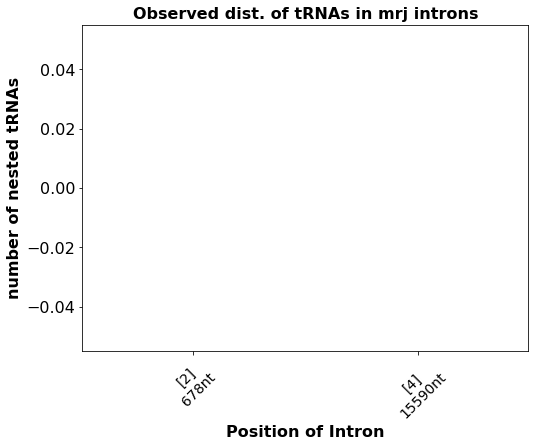

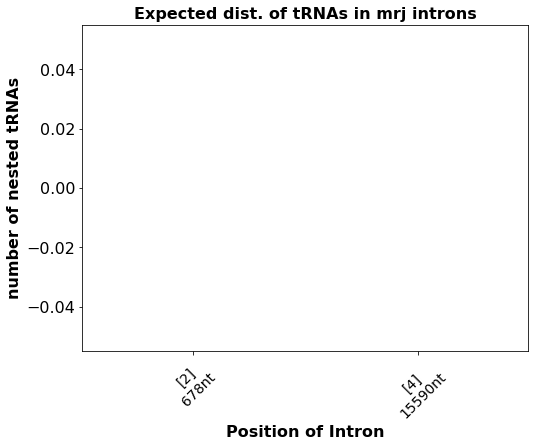

In [381]:
host='mrj'
host_id = host_info[host_info['current_symbol']==host]['current_id'].values[0]
##get the transcript with longest intron
trans_id = total_introns[total_introns['Gene ID']==host_id].sort_values(by='Total Intron Size', ascending=False)['Transcript ID'].values[0]
## then get all introns for that trancript
trans_introns = all_introns[all_introns['Transcript ID']==trans_id]
##add their relative intron proportion which will be their prob under uniform assumption
trans_introns['Relative_length'] = trans_introns['Length']/trans_introns['Length'].sum()

trans_trnas=nested_trnas[nested_trnas['Host_gene_name']==host]

probs_introns = trans_introns[trans_introns['Length']>200]['Relative_length'].values.round(2) ###214 was the smallest intron sie to host trna
intron_rank = trans_introns[trans_introns['Length']>200]['Intron_Rank'].values

##get the observed trna counts
trna_counts = trans_trnas['intron_length'].value_counts().to_frame().reset_index()
trna_counts.columns=['intron_length','number of trnas']

lengths = trans_introns[trans_introns['Length']>200]['Length'].values
counts = []
rank = []
for l in lengths:
    ##append rank_intron_length
    rank.append('['+trans_introns[trans_introns['Length']==l]['Intron_Rank'].values[0]+']'+'\n'+str(l)+'nt')

    trnas = trna_counts[trna_counts['intron_length']==l]['number of trnas'].values
    if trnas:
        counts.append(trnas[0])
    else:
        counts.append(0)  ##doesnt have a trna

###plot the empirical distribution 
figsize=(8,6)
plt.figure(figsize=(figsize))
plt.bar(rank,counts,color='maroon')
plt.ylabel('number of nested tRNAs',fontweight='bold',fontsize=16)
plt.xlabel('Position of Intron',fontweight='bold',fontsize=16)
plt.title('Observed dist. of tRNAs in {} introns'.format(host),fontweight='bold',fontsize=16)
plt.xticks(fontsize=14,rotation=45);plt.yticks(fontsize=16)
plt.savefig('./expected_trna_dist/{}_trnas_obs.png'.format(host),bbox_inches='tight',dpi=200)
plt.show()

"""##simulate the expected trna dist as a poisson spatial process"""
##average rate or intensity of trna counts per 200b
tot = trans_introns['Length'].sum()
window_size = 200 ##smallest intron with a trna is 214nt
lam = sum(counts)/(tot/window_size)

##1000 simulations for expected trnas per intron
sim = [] # lenghts x num_sim 
for l in lengths:
    s = []
    for j in range(10000):
         s.append(np.random.poisson(lam*(l/window_size)))  
    sim.append(s)    

##plot expected
exp_counts = np.mean(sim,axis=1)
plt.figure(figsize=(figsize))
plt.bar(rank,exp_counts,color='teal')
plt.ylabel('number of nested tRNAs',fontweight='bold',fontsize=16)
plt.xlabel('Position of Intron',fontweight='bold',fontsize=16)
plt.title('Expected dist. of tRNAs in {} introns'.format(host),fontweight='bold',fontsize=16)
plt.xticks(fontsize=14, rotation=45);plt.yticks(fontsize=16)
plt.savefig('./expected_trna_dist/{}_trnas_expected.png'.format(host),bbox_inches='tight',dpi=200)
plt.show()

In [386]:
##find out how many gene diverged from significance fo rgenes with 4 ore more
four_plus = ['Ptp61F', 'EcR', 'ATP8A', 'mim']
for host in four_plus:
    print(summary_dict[host][1])


0.9747485446569781
3.2534518753488447e-07
0.4226935446899248
0.9276817209461774


In [388]:
for host in list(summary_dict.keys()):
    pval = summary_dict[host][1]
    if pval<0.05:
        print(pval)

6.9413519668715585e-06
1.9106353434008546e-13
3.2534518753488447e-07
3.2322176590685563e-06


In [372]:
chisquare(f_obs=counts,f_exp=exp_counts)

Power_divergenceResult(statistic=3.0932242204949523, pvalue=0.9283716143693224)

In [227]:
trans_ids = []
for host in host_names:
    host_id = host_info[host_info['# submitted_id']==host]['current_id'].values[0]
    ##get the transcript with longest intron
    trans_ids.append(total_introns[total_introns['Gene ID']==host_id].sort_values(by='Total Intron Size', ascending=False)['Transcript ID'].values[0])


In [233]:
len(host_names)

36

In [232]:
len(trans_ids)

36

In [317]:
host_info

,# submitted_id,current_id,converted_id,current_symbol
0,FBgn0011225,FBgn0011225,FBgn0011225,jar
1,FBgn0014135,FBgn0014135,FBgn0014135,bnl
2,FBgn0044020,FBgn0044020,FBgn0044020,Roc2
3,FBgn0000542,FBgn0000542,FBgn0000542,ec
4,FBgn0051248,FBgn0051248,FBgn0051248,CG31248
...,...,...,...,...
61,FBgn0262579,FBgn0262579,FBgn0262579,Ect4
62,FBgn0032058,FBgn0032058,FBgn0032058,CG9289
63,FBgn0086679,FBgn0086679,FBgn0086679,p
64,FBgn0262614,FBgn0262614,FBgn0262614,pyd


### compare length of host introns to rest of introns

In [323]:
nested_trnas['Host_gene_name'].unique()

array(['caps', 'Esyt2', 'Ptp61F', 'Sulf1', 'Wdr62', 'CG11044', 'EcR',
       'ATP8A', 'mim', 'Btk29A', 'Roc2', 'Mmp2', 'ome', 'Ptr', 'CG32521',
       'kkv', 'pyd', 'CG43143', 'Naam', 'CG10713', 'Ntl', 'p', 'ec',
       'hts', 'Lrt', 'gol', 'Mctp', 'mrj', 'pcs', 'sprt', 'jar', 'qin',
       'sr', 'CG31279', 'PIG-S', 'bnl', 'CG31248', 'bon', 'CG43175',
       'CG14322', 'Sema1a', 'CG4238', 'tai', 'CG9289', 'CG9287', 'd',
       'tkv', 'erm', 'CG15431', 'Cht7', 'prominin-like', 'Dbx',
       'Golgin104', 'Ect4', 'nmo', 'mub', 'hng3', 'lncRNA:CR44999',
       'ABCA', 'Bx', 'CG42340', 'Dop2R', 'sm', 'bs', 'Pu'], dtype=object)

In [335]:
longest = []
host_dict = dict()
for host in host_info['current_symbol'].unique():
    host_id = host_info[host_info['current_symbol']==host]['current_id'].values[0]
    ##get the transcript with longest intron
    trans_id = total_introns[total_introns['Gene ID']==host_id].sort_values(by='Total Intron Size', ascending=False)['Transcript ID'].values[0]
    ## then get all introns for that trancript
    trans_introns = all_introns[all_introns['Transcript ID']==trans_id]
    ##add their relative intron proportion which will be their prob under uniform assumption
    trans_introns['Relative_length'] = trans_introns['Length']/trans_introns['Length'].sum()
    
    trans_trnas=nested_trnas[nested_trnas['Host_gene_name']==host]
    
    trna_counts = trans_trnas['intron_length'].value_counts().to_frame().reset_index()
    trna_counts.columns=['intron_length','number of trnas']
    
    ##assign host or no host intron
    lengths =trans_introns['Length'].values
    label = []
    for l in lengths:
        trnas = trna_counts[trna_counts['intron_length']==l]['number of trnas'].values
        if trnas.shape[0]>0:
            label.append('Host')
        else:
            label.append('No Host')
    trans_introns['Host_status'] = label
    
    ##count number times host intron is largest
    max_in = trans_introns['Length'].max()
    if trans_introns[trans_introns['Length']==max_in]['Host_status'].values[0]=='Host':
        longest.append('True')
    else:
        longest.append('False')
    host_dict[host]=trans_introns

c:\users\rwint\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\rwint\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [336]:
longest.count('True')

40

In [337]:
40/66 

0.6060606060606061

## compute RSCU from these transcript cds as per sharp 1986
1. Compute RSCU which is codon frequency/average frequency for a give aa
1. Compute the relative adaptive weights <b> w<sub>ij</sub></b> for each codon:   <b> w<sub>ij</sub> = RSCU<sub>ij</sub>/ RSCU<sub>imax</sub> </b> where RSCU<sub>imax</sub> is the optimal codon for the amino acid i.  
- CAI =  Geometric Mean(<b> w<sub>ij</sub>)
    
   #### copy from fungal notebook

In [210]:
""" map the amino acid to the codon"""

codon_aa = {"UUU":"F", "UUC":"F", "UUA":"L", "UUG":"L",
    "UCU":"S", "UCC":"s", "UCA":"S", "UCG":"S",
    "UAU":"Y", "UAC":"Y", "UAA":"STOP", "UAG":"STOP",
    "UGU":"C", "UGC":"C", "UGA":"STOP", "UGG":"W",
    "CUU":"L", "CUC":"L", "CUA":"L", "CUG":"L",
    "CCU":"P", "CCC":"P", "CCA":"P", "CCG":"P",
    "CAU":"H", "CAC":"H", "CAA":"Q", "CAG":"Q",
    "CGU":"R", "CGC":"R", "CGA":"R", "CGG":"R",
    "AUU":"I", "AUC":"I", "AUA":"I", "AUG":"M",
    "ACU":"T", "ACC":"T", "ACA":"T", "ACG":"T",
    "AAU":"N", "AAC":"N", "AAA":"K", "AAG":"K",
    "AGU":"S", "AGC":"S", "AGA":"R", "AGG":"R",
    "GUU":"V", "GUC":"V", "GUA":"V", "GUG":"V",
    "GCU":"A", "GCC":"A", "GCA":"A", "GCG":"A",
    "GAU":"D", "GAC":"D", "GAA":"E", "GAG":"E",
    "GGU":"G", "GGC":"G", "GGA":"G", "GGG":"G",}

In [212]:
! head -5 host_transc_cds.fasta

'head' is not recognized as an internal or external command,
operable program or batch file.


In [235]:
##for parsing flybase flies that has a newline within sequences
fasta = []
file=[]
with open('host_transc_cds.fasta', 'r') as f:
    for line in f:
        file.append(line.strip())
            
    for i in range(len(file)):
        line = file[i]
        if line.startswith('>') is True:
            header =(line.rstrip())
            seq = ""
            j=i  #the index for the sequence
            while True:
                j+=1  #the sequence is one position right of the header line
                if j==len(file):
                    break
                if file[j].startswith('>') is True:
                    break  #when it encounters another header
                else:
                    s = file[j]
                    seq+=s
            fasta.append(header)
            fasta.append(seq)
        else:
            continue
fasta[0:2]

['>FBpp0085349 EcR-PA type=CDS; loc=2R:complement(join(6092588..6093733,6093797..6093949,6094010..6094153,6094557..6095071,6151830..6151996,6152069..6152493)); name=EcR-RA; dbxref=FlyBase:FBpp0085349,FlyBase_Annotation_IDs:CG1765-PA,REFSEQ:NP_724456,GB_protein:AAF57278,UniProt/TrEMBL:A4UZ51,FlyMine:FBpp0085349,modMine:FBpp0085349; MD5=f492414f9ae06c98a14d97f1a40c63aa; length=2550; parent=FBgn0000546,FBtr0086008; release=r6.29; species=Dmel;',
 'ATGTTGACGACGAGTGGACAACAACAGTCAAAGCAAAAGCTGTCGACCTTACCTAGCCATATTTTGCTACAACAACAATTAGCTGCCTCTGCAGGCCCATCTTCCTCAGTATCCCTATCCCCATCTTCTTCTGCCGCCCTGACCCTGCATGTAGCCAGTGCTAATGGCGGTGCAAGAGAAACAACTTCTGCAGCCGCAGTCAAGGATAAACTAAGGCCGACACCCACAGCCATTAAAATTGAGCCCATGCCGGACGTCATTTCCGTAGGCACGGTGGCCGGAGGATCTAGCGTAGCTACTGTTGTTGCTCCCGCAGCAACCACAACTTCCAATAAGCCAAATTCTACAGCGGCGCCCTCGACGTCGGCTGCAGCTGCAAATGGTCATTTGGTGCTTGTGCCGAACAAAAGACCGCGACTTGATGTTACCGAGGACTGGATGTCCACTCCTAGTCCAGGCAGCGTGCCCAGCTCTGCGCCGCCACTTTCGCCTTCCCCCGGCTCGCAGAATCACAGCTACAACATGTCCAACGGCTATGCATCCCCCATGTC

In [236]:
with open('host_transc_cds_V2.fasta', 'w') as f:
    for line in fasta:
        f.write(line+'\n')

In [237]:
head = []
seqs = []
with open('host_transc_cds_V2.fasta', 'w') as f:
    for line in fasta:
        if line.startswith('>'):  #get the gene name only
            header = line.rstrip()[1:].split(';')[2].replace('name=',"").replace('-RA',"")
            head.append(header)
        else:
            seqs.append(line.rstrip())
len(seq)==len(head)

False

In [238]:
len(head)

65

In [239]:
len(seqs)

65

In [245]:
refset = pd.DataFrame([head,seqs]).T
refset.columns=['Host_gene','CDS']
refset.head()

,Host_gene,CDS
0,EcR,ATGTTGACGACGAGTGGACAACAACAGTCAAAGCAAAAGCTGTCGA...
1,kkv-RC,ATGTCTGCGATGCGGCATCGCCCGATGGCCCCTCCGGGCCAAGGAC...
2,CG15431,ATGGCCAAACTTTCACGACGTGCCTCGTCGTCTGCAGCAACGCCCT...
3,Nuak1-RF,ATGGTGATAAGCAAACCCGATGGAACGGCGCCCAATGGAGCGGCGG...
4,Naam,ATGGATTCACCTACACCGCCAATTGTCATCGAAGATTCAAACGGAT...


In [255]:
##helper functions

def get_cod_freq(cds):
    codon_count=dict() 
    
    for codon in list(codon_aa.keys()):
        codon_count[codon]=0

    
        cds = cds.upper().replace('T','U')
        codons = []
        ##make a list of codons
        for c in range(0,len(cds),3):
            #assert len(cds)%3 ==0
            codons.append(cds[c:c+3])

        for c in list(codon_count.keys()):
            codon_count[c]+= codons.count(c)
    
    df_rscu=pd.DataFrame(list(codon_count.items()) )
    df_rscu.columns=['Codon', 'Obs_Freq']
    df_rscu['Amino_Acid'] = [codon_aa[codon] for codon in df_rscu['Codon'].values]
    
    return df_rscu

In [250]:
def compute_rscu_weights(df_rscu):
    """ wij = RSCUij/ RSCU i,max"""
    aa_groups = df_rscu.groupby('Amino_Acid')
    aa =  df_rscu['Amino_Acid'].unique()  #make a list of all amino acids to iterate over
    df_list = []
    for a in aa:
        d=aa_groups.get_group(a)
        d['RSCU'] = d['Obs_Freq'].values/d['Obs_Freq'].mean() #obs/expected freq 
        d['Relative_Adaptive_Weights'] = d['RSCU'].values/d['RSCU'].max() 
        d['optimal'] = [True if rscu==d['RSCU'].max() else False for rscu in d['RSCU'].values] #marks optimal codon
        d['Host_gene'] =  gene
        df_list.append(d)
    return pd.concat(df_list)

In [252]:
df_rscu.head()

,Codon,Obs_Freq,Amino_Acid
0,UUU,325,F
1,UUC,650,F
2,UUA,325,L
3,UUG,650,L
4,UCU,910,S


In [253]:
df_rscu.shape

(64, 3)

In [254]:
refset.shape

(65, 2)

In [258]:
##compute rscu of each gene
comb = []
for host in refset['Host_gene'].values:
    cds = refset[refset['Host_gene']==host]['CDS'].values[0]
    df_rscu = get_cod_freq(cds)
    rscu = compute_rscu_weights(df_rscu)
    rscu['Host_gene']=host
    comb.append(rscu)

c:\users\rwint\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\rwint\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\rwint\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [259]:
rscu.head()

,Codon,Obs_Freq,Amino_Acid,RSCU,Relative_Adaptive_Weights,optimal,Host_gene
0,UUU,832,F,0.597487,0.426011,False,Cht7
1,UUC,1953,F,1.402513,1.000000,True,Cht7
2,UUA,124,L,0.186233,0.072515,False,Cht7
3,UUG,793,L,1.190989,0.463743,False,Cht7
16,CUU,528,L,0.792991,0.308772,False,Cht7


In [261]:
comb_rscu = pd.concat(comb,axis=0)
comb_rscu.to_csv('RSCU_hosts.csv')

In [262]:
comb_rscu.head()

,Codon,Obs_Freq,Amino_Acid,RSCU,Relative_Adaptive_Weights,optimal,Host_gene
0,UUU,320,F,0.673684,0.507937,False,EcR
1,UUC,630,F,1.326316,1.000000,True,EcR
2,UUA,310,L,0.529613,0.362573,False,EcR
3,UUG,610,L,1.042141,0.713450,False,EcR
16,CUU,480,L,0.820046,0.561404,False,EcR


In [264]:
### then map trnas to codons
nested_trnas[nested_trnas['Host_gene_name']=='EcR']['tRNA_name'].values

array(['Ile-AAT-1-1-', 'Lys-CTT-1-4-', 'Lys-CTT-1-3-', 'Lys-CTT-1-2-',
       'Lys-CTT-1-1-', 'sn-GTT-1-6-', 'sn-GTT-1-5-', 'sn-GTT-1-4-',
       'sn-GTT-1-3-', 'sn-GTT-1-2-', 'sn-GTT-1-1-', 'rg-ACG-1-2-',
       'rg-ACG-1-1-'], dtype=object)

In [269]:
'sn-GTT-1-3-'[-8:-5]

'GTT'

In [272]:
trnas = []
anticodons=[]
for anti in nested_trnas['tRNA_name'].values:
    if anti[:2]=='sn' or anti[:2]=='rg' or anti[:2]=='la'or anti[:2]=='sp':
        anti='A'+anti
    anticodons.append(anti[4:7])
    trnas.append(anti)
nested_trnas['tRNA_name']=trnas
nested_trnas['Anticodon'] = anticodons
nested_trnas.head()

,Chrom,Start,End,Strand,tRNA_ID,tRNA_name,Host_Exon_ID,intron_length,mRNA_length,Host_gene_name,...,A-content,G-content,T-content,C-content,tRNA_Sequence,A-content_trna,G-content_trna,T-content_trna,C-content_trna,Anticodon
0,3L,13249547,13249618,+,FBgn0011844,Asp-GTC-1-10-,FBtr0305480,12439,4841,caps,...,0.282901,0.208779,0.291181,0.217140,UCCUCGAUAGUAUAGUGGUUAGUAUCCCCGCCUGUCACGCGGGAGA...,0.166667,0.319444,0.236111,0.277778,GTC
1,3R,24555302,24555373,+,FBgn0011845,Asp-GTC-1-11-,FBtr0084647,325,3120,Esyt2,...,0.286154,0.172308,0.350769,0.190769,UCCUCGAUAGUAUAGUGGUUAGUAUCCCCGCCUGUCACGCGGGAGA...,0.166667,0.319444,0.236111,0.277778,GTC
2,3L,1397695,1397766,+,FBgn0011851,Glu-CTC-3-4-,FBtr0310161,126467,5167,Ptp61F,...,0.268979,0.226012,0.280136,0.224873,UCCCAUAUUGUCUAGUGGUUAGGAUAUCCGGCUCUCACCCGGAAGG...,0.194444,0.277778,0.263889,0.263889,CTC
3,3L,1397932,1398003,+,FBgn0011852,Glu-CTC-3-5-,FBtr0310161,126467,5167,Ptp61F,...,0.268979,0.226012,0.280136,0.224873,UCCCAUAUUGUCUAGUGGUUAGGAUAUCCGGCUCUCACCCGGAAGG...,0.194444,0.277778,0.263889,0.263889,CTC
4,3L,1398169,1398240,+,FBgn0011853,Glu-CTC-3-6-,FBtr0310161,126467,5167,Ptp61F,...,0.268979,0.226012,0.280136,0.224873,UCCCAUAUUGUCUAGUGGUUAGGAUAUCCGGCUCUCACCCGGAAGG...,0.194444,0.277778,0.263889,0.263889,CTC


In [273]:
nested_trnas.to_csv('trna_host_genes_merged.csv',sep=',',index=False)

In [274]:
nest=nested_trnas[['Host_gene_name','tRNA_name','Anticodon']]
nest.head()

,Host_gene_name,tRNA_name,Anticodon
0,caps,Asp-GTC-1-10-,GTC
1,Esyt2,Asp-GTC-1-11-,GTC
2,Ptp61F,Glu-CTC-3-4-,CTC
3,Ptp61F,Glu-CTC-3-5-,CTC
4,Ptp61F,Glu-CTC-3-6-,CTC


In [293]:
nest.to_csv('trna_hosts_truncated.csv',sep=',',index=False)

In [277]:
nest[nest['Host_gene_name']=='EcR']['Anticodon'].value_counts()

GTT    6
CTT    4
ACG    2
AAT    1
Name: Anticodon, dtype: int64

In [279]:
comb_rscu['Host_gene'].unique()

array([' EcR', ' kkv-RC', ' CG15431', ' Nuak1-RF', ' Naam', ' Golgin104',
       ' CG14322', ' bnl', ' hng3-RB', ' CG11044', ' Mctp', ' Ntl',
       ' Wdr62', ' mrj-RH', ' nmo-RB', ' prominin-like-RD', ' CG31279-RD',
       ' bon-RD', ' TrpA1-RH', ' d-RE', ' Roc2-RB', ' sprt', ' CG4238-RH',
       ' CG10713', ' Mmp2-RB', ' ec-RB', ' pyd-RJ', ' Dop2R-RF',
       ' tai-RD', ' Sema1a-RE', ' pcs-RB', ' Ect4-RI', ' CG32521-RG',
       ' sm-RU', ' CG43175-RB', ' caps-RD', ' qin-RB', ' Btk29A-RE',
       ' Pu-RB', ' Dbx-RC', ' PIG-S-RC', ' p-RB', ' CG42340-RD', ' sr-RD',
       ' ome-RE', ' erm-RB', ' Lrt-RB', ' CG31248', ' Bx-RF', ' CG9287',
       ' CG9289', ' mim-RL', ' jar-RG', ' ABCA-RB', ' bs-RC', ' gol-RD',
       ' Esyt2', ' Ptp61F-RE', ' ATP8A-RE', ' mub-RF', ' Sulf1-RB',
       ' tkv', ' hts-RO', ' Ptr', ' Cht7'], dtype=object)

In [281]:
##fix names
names = []
for n in comb_rscu['Host_gene'].values:
    names.append(n.replace(" ",""))
comb_rscu['Host_gene']=names

In [340]:
names = []
for n in comb_rscu['Host_gene'].values:
    n = n.replace("-RB","").replace("-RE","").replace("-RB","").replace("-RD","").replace("-RI","").replace("-RJ","")
    n = n.replace("-RL","").replace("-RC","").replace("-RG","").replace("-RU","").replace("-RH","").replace("-RF","").replace("-RO","")
    names.append(n)
comb_rscu['Host_gene']=names

In [341]:
comb_rscu['Host_gene'].unique()

array(['EcR', 'kkv', 'CG15431', 'Nuak1', 'Naam', 'Golgin104', 'CG14322',
       'bnl', 'hng3', 'CG11044', 'Mctp', 'Ntl', 'Wdr62', 'mrj', 'nmo',
       'prominin-like', 'CG31279', 'bon', 'TrpA1', 'd', 'Roc2', 'sprt',
       'CG4238', 'CG10713', 'Mmp2', 'ec', 'pyd', 'Dop2R', 'tai', 'Sema1a',
       'pcs', 'Ect4', 'CG32521', 'sm', 'CG43175', 'caps', 'qin', 'Btk29A',
       'Pu', 'Dbx', 'PIG-S', 'p', 'CG42340', 'sr', 'ome', 'erm', 'Lrt',
       'CG31248', 'Bx', 'CG9287', 'CG9289', 'mim', 'jar', 'ABCA', 'bs',
       'gol', 'Esyt2', 'Ptp61F', 'ATP8A', 'mub', 'Sulf1', 'tkv', 'hts',
       'Ptr', 'Cht7'], dtype=object)

In [342]:
comb_rscu.to_csv('RSCU_hosts.csv')

In [286]:
comb_rscu[comb_rscu['Host_gene']=='EcR'].query('optimal==True')['Codon'].values

array(['UUC', 'CUG', 'UCG', 'UCC', 'UAC', 'UAG', 'UGC', 'UGG', 'CCC',
       'CAU', 'CAG', 'CGC', 'AUU', 'AUG', 'ACC', 'AAC', 'AAG', 'GUC',
       'GCC', 'GAC', 'GAG', 'GGC'], dtype=object)

In [287]:
##add antiocon
def anticodon_to_codon(anticodon):
    ##make a complementary dictionary
    comp_dict={'A':'T','T':'A','G':'C','C':'G'}
    
    codon = ""
    for i in anticodon[::-1]:  #this code reverse the order
        codon+= "".join(comp_dict[i])
    return codon

In [290]:
nest['Anticodon'].unique()

array(['GTC', 'CTC', 'GAA', 'GCC', 'AAT', 'CTT', 'TTT', 'CAA', 'CAT',
       '-CA', 'GTT', 'TCG', 'ACG', 'GCT', 'CAC', 'AAC', 'GTA', 'CGG',
       'CGA', 'CCA', 'CGC', 'AAG', 'CTG', 'TTC', 'TGT', 'TAA', 'TGG',
       'TCC', 'AGT', 'AGC', 'TCT', 'GCA', 'CAG', 'TTG'], dtype=object)

In [291]:
nest['Anticodon'] = nest['Anticodon'].replace('-CA','CAT')

c:\users\rwint\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [292]:
nest['Codon']=nest['Anticodon'].apply(anticodon_to_codon)
nest.head()

c:\users\rwint\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Host_gene_name,tRNA_name,Anticodon,Codon
0,caps,Asp-GTC-1-10-,GTC,GAC
1,Esyt2,Asp-GTC-1-11-,GTC,GAC
2,Ptp61F,Glu-CTC-3-4-,CTC,GAG
3,Ptp61F,Glu-CTC-3-5-,CTC,GAG
4,Ptp61F,Glu-CTC-3-6-,CTC,GAG


In [294]:
comb_rscu[comb_rscu['Host_gene']=='EcR'].query('optimal==True')['Codon'].values

array(['UUC', 'CUG', 'UCG', 'UCC', 'UAC', 'UAG', 'UGC', 'UGG', 'CCC',
       'CAU', 'CAG', 'CGC', 'AUU', 'AUG', 'ACC', 'AAC', 'AAG', 'GUC',
       'GCC', 'GAC', 'GAG', 'GGC'], dtype=object)

In [296]:
comb_rscu['Codon']= comb_rscu['Codon'].replace('U','T')
comb_rscu[comb_rscu['Host_gene']=='EcR'].query('optimal==True')['Codon'].values

array(['UUC', 'CUG', 'UCG', 'UCC', 'UAC', 'UAG', 'UGC', 'UGG', 'CCC',
       'CAU', 'CAG', 'CGC', 'AUU', 'AUG', 'ACC', 'AAC', 'AAG', 'GUC',
       'GCC', 'GAC', 'GAG', 'GGC'], dtype=object)

In [297]:
##LONG WAY
cod=[]
for c in comb_rscu['Codon'].values:
    cod.append(c.replace('U','T'))
comb_rscu['Codon']=cod
comb_rscu[comb_rscu['Host_gene']=='EcR'].query('optimal==True')['Codon'].values

array(['TTC', 'CTG', 'TCG', 'TCC', 'TAC', 'TAG', 'TGC', 'TGG', 'CCC',
       'CAT', 'CAG', 'CGC', 'ATT', 'ATG', 'ACC', 'AAC', 'AAG', 'GTC',
       'GCC', 'GAC', 'GAG', 'GGC'], dtype=object)

In [295]:
nest[nest['Host_gene_name']=='EcR']['Codon'].value_counts()

AAC    6
AAG    4
CGT    2
ATT    1
Name: Codon, dtype: int64

In [301]:
##add optimal label if anticodon complement is optimal
df = nest[nest['Host_gene_name']=='EcR']['Codon'].value_counts().to_frame().reset_index()
df.columns=['Codon_trna','Frequency']
df.head()

,Codon_trna,Frequency
0,AAC,6
1,AAG,4
2,CGT,2
3,ATT,1


In [373]:
##add optimal label if anticodon complement is optimal
df = nest[nest['Host_gene_name']=='ATP8A']['Codon'].value_counts().to_frame().reset_index()
df.columns=['Codon_trna','Frequency']
df.head()

,Codon_trna,Frequency
0,ATT,6
1,TTG,2


In [374]:
nest[nest['Host_gene_name']=='ATP8A']

,Host_gene_name,tRNA_name,Anticodon,Codon
11,ATP8A,Ile-AAT-1-3-,AAT,ATT
12,ATP8A,Ile-AAT-1-4-,AAT,ATT
13,ATP8A,Ile-AAT-1-5-,AAT,ATT
14,ATP8A,Ile-AAT-1-6-,AAT,ATT
15,ATP8A,Ile-AAT-1-7-,AAT,ATT
25,ATP8A,Leu-CAA-2-1-,CAA,TTG
26,ATP8A,Leu-CAA-1-1-,CAA,TTG
69,ATP8A,Ile-AAT-1-8-,AAT,ATT


### count cases of optimality

In [304]:
l = []
for c in df['Codon_trna'].values:
    opt_codons = comb_rscu[comb_rscu['Host_gene']=='EcR'].query('optimal==True')['Codon'].values
    if c in opt_codons:
        l.append('optimal')
    else:
        l.append('non_optimal')
df['Optimality']=l
df

,Codon_trna,Frequency,Optimality
0,AAC,6,optimal
1,AAG,4,optimal
2,CGT,2,non_optimal
3,ATT,1,optimal


In [348]:
opts = [] ##stores number of nested trnas that are optimal
count = 0 ##counts whenever agene hase optimal codon contente
opt_host_dict=dict()
for host in comb_rscu['Host_gene'].unique():
    df = nest[nest['Host_gene_name']==host]['Codon'].value_counts().to_frame().reset_index()
    df.columns=['Codon_trna','Frequency']
    l = []
    for c in df['Codon_trna'].values:
        opt_codons = comb_rscu[comb_rscu['Host_gene']==host].query('optimal==True')['Codon'].values
        if c in opt_codons:
            l.append('optimal')
        else:
            l.append('non_optimal')
    if l.count('optimal') >0:
        count+=1 ##update for case where a geen nests ints optimal codo
    df['Optimality']=l
    opts.append(df[df['Optimality']=='optimal'].shape[0])
    
    opt_host_dict[host]=df

In [349]:
count

32

In [347]:
32/65

0.49230769230769234

In [351]:
sum(opts)

37

### I need to model the expectation that an intron contains multiple tRNAs of the same identity given 45 possible tRNAs.

- look if diversity of tRNAs is less than total tRNAs
- look if all the tRNAs were the same

In [389]:
### compute how many multi-host gene have the same nested trna
multis = ['Ptp61F', 'Sulf1', 'EcR', 'ATP8A', 'mim', 'ome', 'Ptr', 'pyd',
       'CG10713', 'p', 'ec', 'hts', 'Lrt', 'gol', 'mrj', 'sr', 'PIG-S',
       'CG43175', 'CG14322', 'Sema1a', 'CG4238', 'CG9289', 'd', 'tkv',
       'Cht7', 'Ect4', 'ABCA']

In [394]:
df['Codon_trna'].unique()

array(['ATT', 'TTG'], dtype=object)

In [399]:
## check if diversity of tRNAs is less than total tRNAs
c= 0 ##counter the number of cases
for host in multis:
    df = nest[nest['Host_gene_name']==host]['Codon'].value_counts().to_frame().reset_index()
    df.columns=['Codon_trna','Frequency']
    if df['Codon_trna'].unique().shape[0] < df['Frequency'].sum():
        c+=1
c

23

In [400]:
23/27 ##85 percent of multihost genes 

0.8518518518518519

In [404]:
2/10  #2 unique trnas: 10 total tRNAs. low diversity

0.2

In [430]:
(1/2) ##no diversity so should be zero

0.5

In [434]:
2/1 /2  ## 1 - sum of trnas/ unique tRNAs normalised by total 

1.0

In [454]:
nest.head()

,Host_gene_name,tRNA_name,Anticodon,Codon
0,caps,Asp-GTC-1-10-,GTC,GAC
1,Esyt2,Asp-GTC-1-11-,GTC,GAC
2,Ptp61F,Glu-CTC-3-4-,CTC,GAG
3,Ptp61F,Glu-CTC-3-5-,CTC,GAG
4,Ptp61F,Glu-CTC-3-6-,CTC,GAG


In [ ]:
aa = []
for t in nest['tRNA_name'].values:
    aa.append

In [437]:
## ratio of unique to total tRNAs
#1-(unique_trnas/total_trnas)  /total_trnas)  diverstiy index
ratios = []
for host in multis:
    df = nest[nest['Host_gene_name']==host]['Codon'].value_counts().to_frame().reset_index()
    df.columns=['Codon_trna','Frequency']
    
    uniq_trna = df['Codon_trna'].unique().shape[0]
    tot_trna = df['Frequency'].sum()
    div_index = 1-((tot_trna/uniq_trna)/tot_trna)
    ratios.append(div_index)

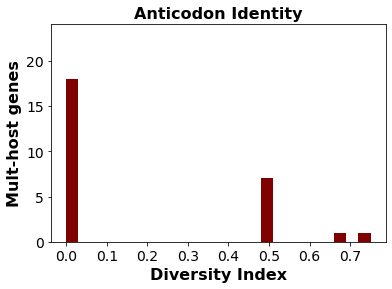

In [455]:
plt.hist(ratios,bins=25,color='maroon')
#plt.axvline(np.mean(ratios),color='navy',linestyle='dashed')
plt.xlabel('Diversity Index' ,fontsize=16,fontweight='bold')
plt.ylabel('Mult-host genes', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14);plt.yticks(fontsize=14)
plt.title('Anticodon Identity',fontsize=16,fontweight='bold')
plt.ylim(0,24)
plt.show()

In [458]:
ratios=np.asarray(ratios)
len(ratios[ratios<=0.5])

25

In [450]:
18/27

0.6666666666666666

In [457]:
len(ratios[ratios==0.0])

18

## look at amino acid
